<a href="https://colab.research.google.com/github/Luminatrix/World-Happiness/blob/master/DS_BuildWeek1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##BUILD WEEK UNIT 1

This project began with my friends and I asking a question about dating apps, and whether or not they were actually useful. I went through the process of collecting and cleaning all of the data for that (or so I thought) -- got 80 percent of the way through only to realize that in order to get the calculations I needed, I would need totals of certain data from dating sites dating back to 1995 and given my current skill set, length of time it takes me to teach myself something, against the backdrop of buildweek timelines, I chose to scrap that idea and start over.

#WORLD HAPPINESS 2019

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from itertools import product
%matplotlib inline
#importing libraries + setting backend to inline


#SOURCES

https://www.kaggle.com/unsdsn/world-happiness
Gender: UN Data set that includes Gender Inequality Index, female political participation and internet users.

UNDP Human Development Reports Office (HDRO)http://hdr.undp.org/en

Global internet use(concatenated onto gender above) http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H


In [0]:
url = 'https://raw.githubusercontent.com/Luminatrix/World-Happiness/master/world-happiness-report-2019.csv'
url2 = 'https://raw.githubusercontent.com/Luminatrix/World-Happiness/master/countries%20-%20Sheet1.csv'
happiness = pd.read_csv(url)
region = pd.read_csv(url2)
happiness.columns = ['Country (region)', 'Life Satisfaction', 'STD of Life Satisfaction', 'Positive Emotion', 'Negative Emotion', 'Social Support', 'Freedom', 'Corruption', 'Generosity', 'GDP per capita', 'Healthy Life-expectancy' ]

# Dataset is now stored in a Pandas Dataframe, with new column names




In [39]:
happiness.head()


,Country (region),Life Satisfaction,STD of Life Satisfaction,Positive Emotion,Negative Emotion,Social Support,Freedom,Corruption,Generosity,GDP per capita,Healthy Life-expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0



Each cell contains a measurement of how it ranks compared to the other countries on the list.

Columns 'Social support', 'Freedom', 'Corruption', 'Generosity', 'GDP per capita', 'Healthy Life-expectancy' are a measure of how heavily the column contributed to that region's happiness score and is NOT a reflection of how happy that Region is.

This is an important differentiation to make: A country with low happiness in Life Satisfaction but ranking low in Freedom, means that the lack in Freedom played a role in the low happiness score

In [0]:
# region.head()

In [0]:
# happiness.describe()
# region.describe()

In [0]:
# happiness.isnull().sum()
happiness = happiness.fillna(0)



In [0]:
# region.isnull().sum()
region = region.fillna(0)

In [0]:
# happiness.head()

#Heat Map Correlations
###Below are the correlative strengths & weaknesses between different columns.

Expectedly, Healthy Life Expectancy, Social Support and
GDP per capita (Standard of Living) have large impacts towards perceived happiness.


Unexpectedly, corruption seems to play very little role in how the country is ranked and almost no relationship with any of the other factors. 

Very interesting that Corruption has an extremely high likelihood of positive correlation with Freedom.



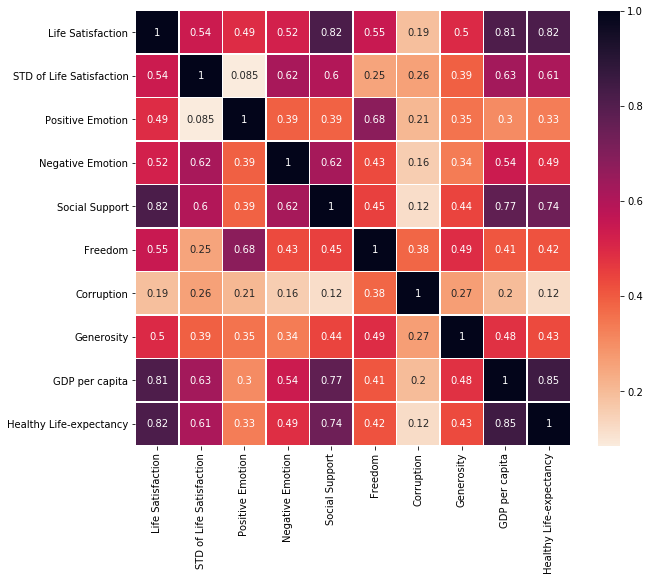

In [24]:
plt.figure(figsize = (10, 8))
sns.heatmap(happiness.corr(), annot=True, linewidths=.5, square=True, cmap="rocket_r")

#Joint Plot Correlations
Showing extreme potential for positive correlation

In [1]:
g = sns.jointplot('Freedom', 'Corruption',data=happiness, kind='hex' )
g.ax_joint.scatter('Freedom', 'Corruption', c=red)




NameError: ignored

In [25]:
# Strip whitespaces
region = region.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


# Merge happiness metrics with other country-related metrics
#Merging dataframes
df = pd.merge(left=happiness,right=region, left_on='Country (region)', right_on='Country')
df.shape

(142, 31)

In [0]:
df.head(2)

In [26]:
df.groupby('Region').mean()

,Life Satisfaction,STD of Life Satisfaction,Positive Emotion,Negative Emotion,Social Support,Freedom,Corruption,Generosity,GDP per capita,Healthy Life-expectancy,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),90.380952,61.142857,68.238095,72.476190,88.476190,56.857143,71.350000,56.809524,80.500000,78.368421,1.698279e+08,1.056099e+06,816.247619,6.121905,1.513333,45.265714,7723.809524,76.242857,160.504762,17.750000,4.012381,78.237619,1.850000,21.900000,8.086190,0.178810,0.313857,0.507286
BALTICS,50.000000,39.000000,102.333333,28.333333,21.000000,97.666667,78.333333,104.000000,38.666667,57.000000,2.394991e+06,5.833833e+04,39.833333,3.116667,-2.033333,8.103333,11300.000000,99.733333,292.866667,30.310000,0.610000,69.080000,3.000000,9.343333,12.630000,0.045000,0.293333,0.661667
C.W. OF IND. STATES,85.500000,49.500000,110.250000,42.083333,63.166667,93.583333,76.909091,84.250000,83.583333,85.166667,2.334013e+07,1.841737e+06,56.708333,0.093333,-2.033333,44.410000,4000.000000,98.725000,163.850000,19.454167,2.022500,78.523333,2.550000,17.855833,10.341667,0.192000,0.328000,0.480167
EASTERN EUROPE,62.272727,56.454545,100.000000,60.818182,54.636364,88.636364,128.818182,82.909091,51.363636,44.363636,1.049234e+07,1.000994e+05,102.072727,1.125455,-0.734545,11.926364,10145.454545,97.088889,286.690909,32.562727,2.382727,65.055455,3.000000,10.531000,10.486000,0.087636,0.309364,0.603091
LATIN AMER. & CARIB,52.000000,108.500000,34.900000,89.050000,62.200000,60.500000,84.050000,92.350000,81.300000,60.000000,2.706073e+07,9.948965e+05,84.865000,1.540500,-1.827500,26.601500,5890.000000,86.450000,141.640000,10.769500,3.695000,85.536000,2.075000,22.363000,6.057500,0.113200,0.304900,0.581950
NEAR EAST,71.153846,88.307692,104.916667,97.666667,83.833333,92.583333,79.857143,66.750000,43.250000,66.384615,1.446745e+07,3.182235e+05,186.923077,3.503846,2.887692,23.998462,11753.846154,79.807692,221.808333,9.462308,3.194615,87.343077,1.500000,22.550000,5.032308,0.067231,0.426385,0.506154
NORTHERN AFRICA,102.000000,83.400000,120.200000,118.000000,110.400000,115.200000,70.200000,129.000000,80.400000,84.200000,3.222682e+07,1.150578e+06,46.520000,0.298000,-0.432000,30.916000,5460.000000,67.240000,100.200000,8.918000,3.366000,87.716000,1.666667,20.814000,4.806000,0.135000,0.426200,0.438400
NORTHERN AMERICA,14.000000,36.000000,26.500000,59.500000,28.500000,35.500000,26.500000,13.000000,14.500000,23.500000,1.657716e+08,9.808045e+06,17.150000,1.115000,4.685000,5.625000,33800.000000,97.000000,725.100000,12.045000,0.120000,87.835000,3.000000,12.460000,8.030000,0.016000,0.249000,0.735500
OCEANIA,9.500000,20.500000,34.500000,24.500000,6.000000,12.500000,9.000000,7.000000,22.000000,12.000000,1.217011e+07,3.977765e+06,8.900000,2.985000,4.015000,5.270000,25300.000000,99.500000,503.600000,6.075000,3.515000,90.410000,2.000000,12.950000,7.520000,0.040500,0.267500,0.692000



#Life Satisfaction by Region

In this box plot, we can see that, according to these observations, Humans in Western Europe report the most happiness, while Humans in Sub-Saharan Africa report the least happiness. 

Humans in the Near East (ex: Countries in the Middle East, UAE etc) have both the greatest distribution of reports of Happiness, which most likely points to a large variance in the populations satisfaction. The UAE and Israel have the highest ranking of Life Satisfaction. Syria and Yemen, with the lowest. 

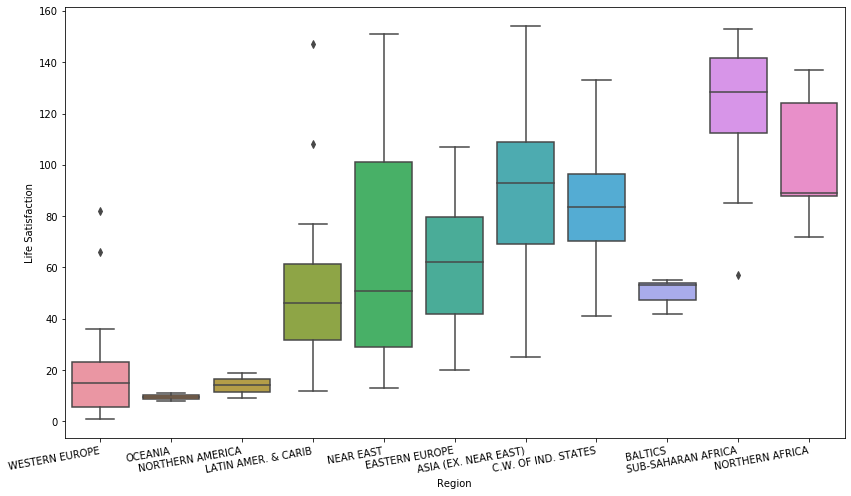

In [27]:
plt.figure(figsize = (12, 7))
ax = sns.boxplot(x='Region', y='Life Satisfaction', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='right')
plt.tight_layout()

#The Importance of Happiness Metrics by Region

In [0]:
metrics = ['Social Support', 'Freedom', 'Corruption', 'Generosity', 'GDP per capita', 'Healthy Life-expectancy']

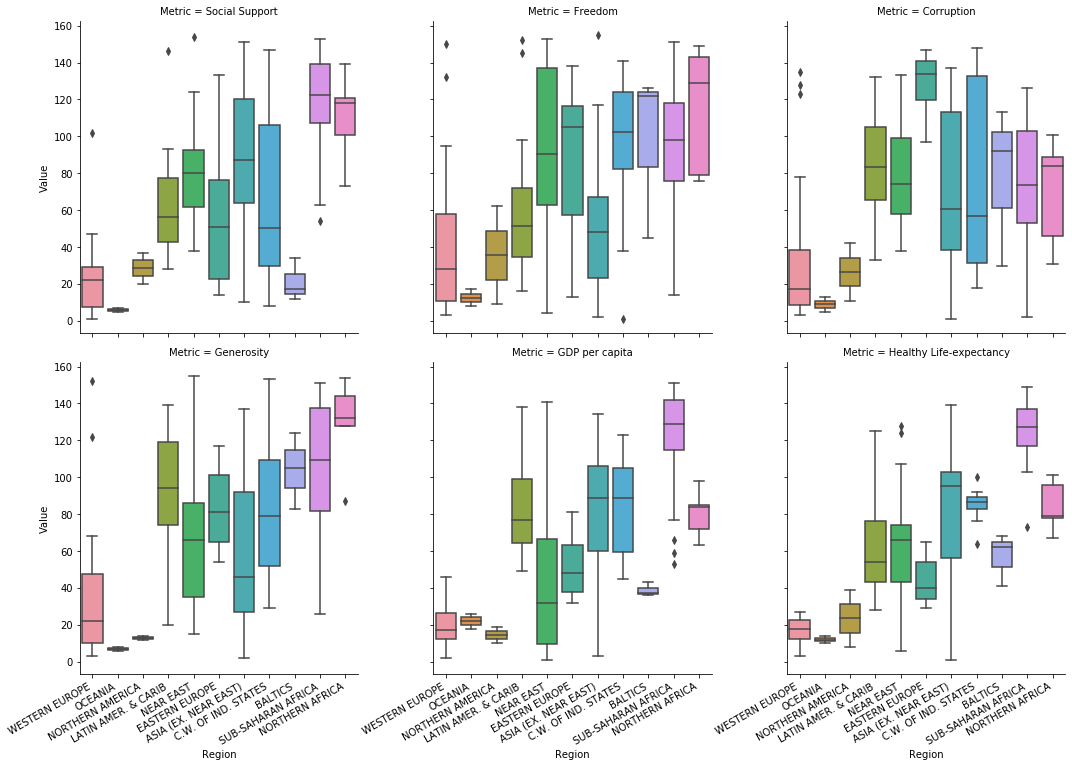

In [35]:
cols = df[['Region'] + metrics].melt(id_vars=['Region'], var_name='Metric',value_name='Value')
chart = sns.catplot(kind="box", x="Region", y="Value", col='Metric', col_wrap=3, data=cols)
chart.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


#The Significance of Freedom and Corruption on Individual Happiness.

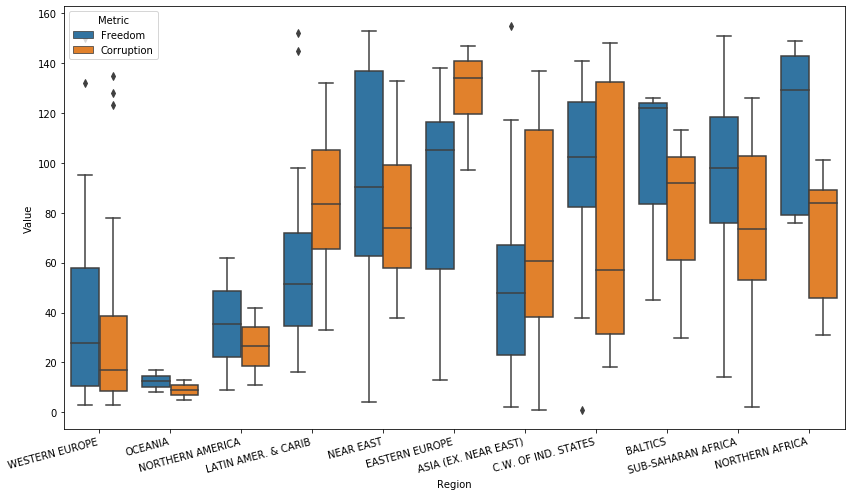

In [36]:
plt.figure(figsize = (12, 7))
freecor = df[['Region', 'Freedom', 'Corruption']].melt(id_vars=['Region'], var_name='Metric',value_name='Value')
ax = sns.boxplot(x="Region", y="Value", hue='Metric', data=freecor)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right")
plt.tight_layout()

In [38]:
IsoCountry = happiness['Country (region)']

IsoCountry

0                       Finland
1                       Denmark
2                        Norway
3                       Iceland
4                   Netherlands
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country (region), Length: 156, dtype: object

In [0]:
# regionplot = sns.stripplot(x="Region", y="Social Support", data=df, jitter=True)
# plt.xticks(rotation=60)

#Analyzing GENDER INEQUALITY and it's relationship to global happiness. DRAFT

In [0]:
#Loading Data from UN Gender Inequality Data set (GII) that is concatenated with UN data Political Participation and Female Internet Usage by Country
# url3 = 'https://raw.githubusercontent.com/Luminatrix/World-Happiness/master/UN-Gender-Inequality-Index%20-%20Sheet1.csv'
# gendermetrics = pd.read_csv(url3)
# gendermetrics.fillna(0, inplace=True)
# gendermetrics.isnull().sum()
# gendermetrics.dtypes

In [0]:

# # Convert "Gender Inequality Index" data type from object to numeric (float64)
# gendermetrics['Gender Inequality Index'] = gendermetrics['Gender Inequality Index'].astype(int)
# gendermetrics['Gender Inequality Index'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
# gendermetrics.dtypes

In [0]:
# # Changing Internet users, female (% of female population) to numeric datatype

# gendermetrics['Internet users, female (% of female population)'] = pd.to_numeric(gendermetrics['Internet users, female (% of female population)'],errors='coerce')




# np.mean(gendermetrics['Internet users, female (% of female population)'])

# #Mean of "Internet users, female (% of female population" is 0.34539

# # print(gendermetrics)
# # gendermetrics.dtypes

approximately 35 percent of the female global population use the internet for work, education, entertainment or civically engaging. 

In [0]:
# gendermetrics.columns
# gendermetrics.info()
# gendermetrics.shape
# gendermetrics.head()


In [0]:
# gendermetrics['Gender Inequality Index'] = gendermetrics['Gender Inequality Index'].astype(float, errors='ignore')
# type(gendermetrics['Gender Inequality Index'][0])

In [0]:
# # np.mean(gendermetrics['Gender Inequality Index'])
# GII = gendermetrics.groupby('Gender Inequality Index')
# Par = gendermetrics.groupby('Share of seats in parliament')

In [0]:

# plt.scatter(x=GII['Gender Inequality Index'], y=Par['Share of seats in parliament'], color='pink')
# plt.xlabel('Gender Inequality Index')
# plt.ylabel('Share of Women in Parliament')
# plt.title('GII Relation With Number of Women in Parliament')

# plt.show()

In [0]:
# # Changing GII datatype from object to numeric
# gendermetrics['Gender Inequality Index'] = gendermetrics['Gender Inequality Index'].astype(float, errors='ignore')

In [0]:
# # Changing 'Gender Inequality Index' and 'Rank' and'Female Labor Force...' into float or integers

# gendermetrics['Internet users, female (% of female population)'] = pd.to_numeric(gendermetrics['Internet users, female (% of female population)'],errors='coerce')

In [0]:
# # Strip whitespaces
# MULTI = gendermetrics.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


# # Merge happiness metrics with other country-related metrics
# #Merging dataframes
# happygendf = pd.merge(left=df,right=MULTI, left_on='Country (region)', right_on='Country')
# happygendf.shape
# happygendf.head()

In [0]:
# #df from above, life satisfaction + region + gender metrics

# happywithgender = df.groupby('Life Satisfaction')
# regionwithgender = df.groupby('Region')
# GII = gendermetrics.groupby('Gender Inequality Index')

# plt.scatter(x=happygendf['Gender Inequality Index'], color='pink'), y=happygendf[''], color='pink')
# plt.xlabel('Gender Inequality Index')
# plt.ylabel('Happiness')
# plt.title('GII Relation With Happiness by Region')

# plt.show()


# genderhappyplot = sns.stripplot(x="Gender Inequality Index", y="Life Satisfaction", data=happygendf, jitter=True)
# plt.xticks(rotation=60)

In [0]:
# g = sns.jointplot('Gender Inequality Index', 'Life Satisfaction',data=happygendf, kind='hex' )
# g.ax_joint.scatter('Gender Inequality Index', 'Life Satisfaction', c=classes)



In [0]:
# metrics = ['Gender Inequality Index', 'Life Satisfaction', 'Freedom', 'Corruption', 'Number of Women’s Orgs', 'Internet users, female (% of female population)'

In [0]:
#df from above + life satisfaction + Number of Women’s Orgs

In [0]:
# px.data.gapminder().query("year==2019")
# fig = px.scatter_geo(happygendf, locations="iso_alpha", color="continent",
#                      hover_name="country", size="pop",
#                      projection='natural earth')
# fig.show()